In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm
from seaborn import color_palette

pd.set_option('display.max_rows', None)

# Archivo Bitcoin

In [320]:
Bitcoin_A = pd.read_excel("bitcoin_A.xlsx")
Bitcoin_A['DIA'] = pd.to_datetime(Bitcoin_A['DIA'], format='%Y-%m-%d')
Bitcoin_A.head()

,DIA,PRECIO,N_TRANS
0,2018-09-18,6296.631667,244259
1,2018-09-19,6335.826667,251037
2,2018-09-20,6418.562667,253674
3,2018-09-21,6669.990833,273051
4,2018-09-22,6709.312500,225537


                 PRECIO  N_TRANS
DIA                             
2018-09-18  6296.631667   244259
2018-09-19  6335.826667   251037
2018-09-20  6418.562667   253674
2018-09-21  6669.990833   273051
2018-09-22  6709.312500   225537


(array([17775., 17836., 17897., 17956., 18017., 18078., 18140.]),
 [Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09')])

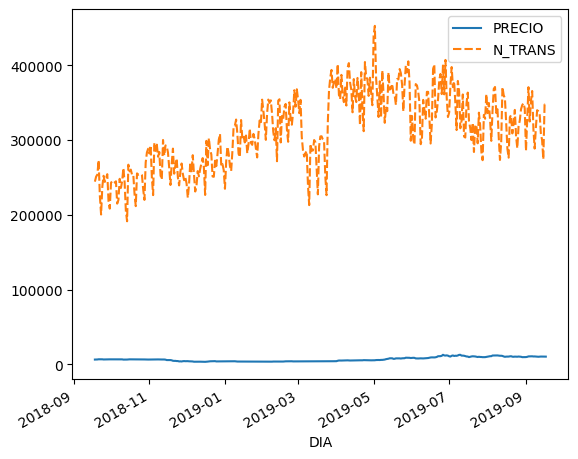

In [321]:

Bitcoin_A.index = Bitcoin_A['DIA']
del Bitcoin_A['DIA']
print(Bitcoin_A.head())
sns.lineplot(Bitcoin_A)
plt.xticks(rotation=30, ha='right')


(array([17775., 17836., 17897., 17956., 18017., 18078., 18140.]),
 [Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09')])

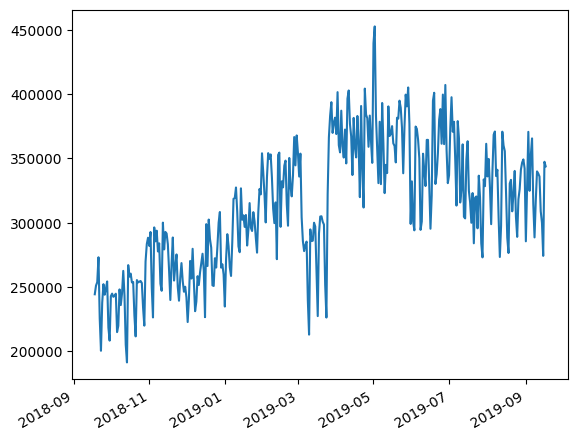

In [322]:
plt.plot(Bitcoin_A["N_TRANS"])
plt.xticks(rotation=30, ha='right')

(array([17775., 17836., 17897., 17956., 18017., 18078., 18140.]),
 [Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09')])

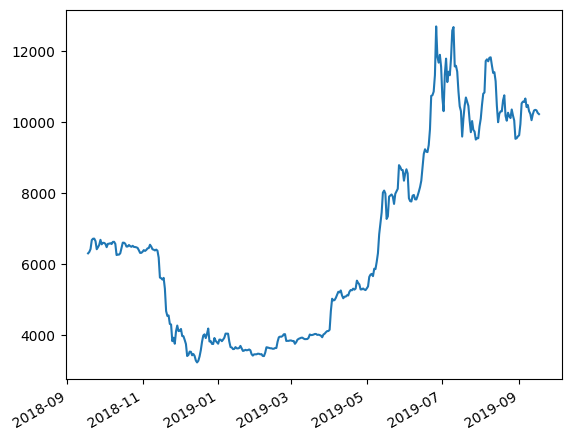

In [323]:
plt.plot(Bitcoin_A["PRECIO"])
plt.xticks(rotation=30, ha='right')

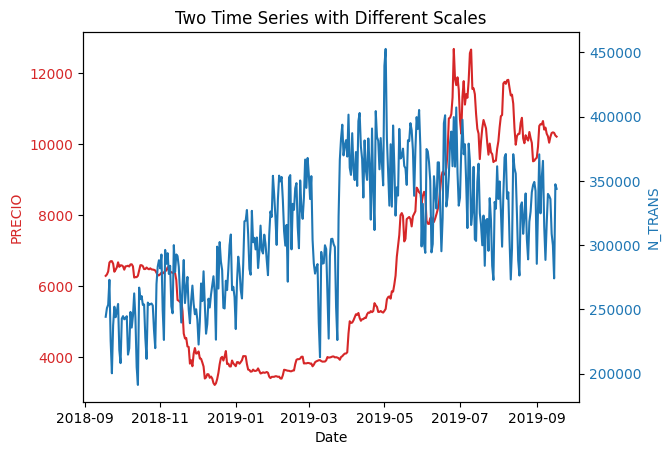

In [324]:
# 1. Crear un gráfico con dos ejes y compartir el eje x
fig, ax1 = plt.subplots()

# 2. Primera serie en el eje izquierdo (ax1)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('PRECIO', color=color)
ax1.plot(Bitcoin_A['PRECIO'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 3. Segunda serie en el eje derecho (ax2)
ax2 = ax1.twinx() # Compartir el eje x
color = 'tab:blue'
ax2.set_ylabel('N_TRANS', color=color)
ax2.plot(Bitcoin_A['N_TRANS'],
color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 4. Ajustes de diseño
plt.title('Two Time Series with Different Scales')
plt.show()

## Prediccion de bitcoin 

In [325]:
import statsmodels.api as sm
precio_R = Bitcoin_A.PRECIO.loc['2019-08-01':]
precio_R.index.freq = 'D'
# Aplicar suavizado exponencial simple.
modelo_ses = sm.tsa.SimpleExpSmoothing(precio_R , initialization_method="estimated").fit()
# Para seleccionar distintas alphas, fit(smoothing_level=alpha)
# Calcular la predicción para 7 días.
precio_s1 = modelo_ses.forecast(steps=7)
# Para ver parámetros, e.g.: alpha = 0.995
modelo_ses.summary() 

Dep. Variable:,PRECIO,No. Observations:,48
Model:,SimpleExpSmoothing,SSE,3535075.280
Optimized:,True,AIC,541.938
Trend:,None,BIC,545.681
Seasonal:,None,AICC,542.868
Seasonal Periods:,None,Date:,"Sat, 08 Feb 2025"
Box-Cox:,False,Time:,11:02:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,10237.184,l.0,True


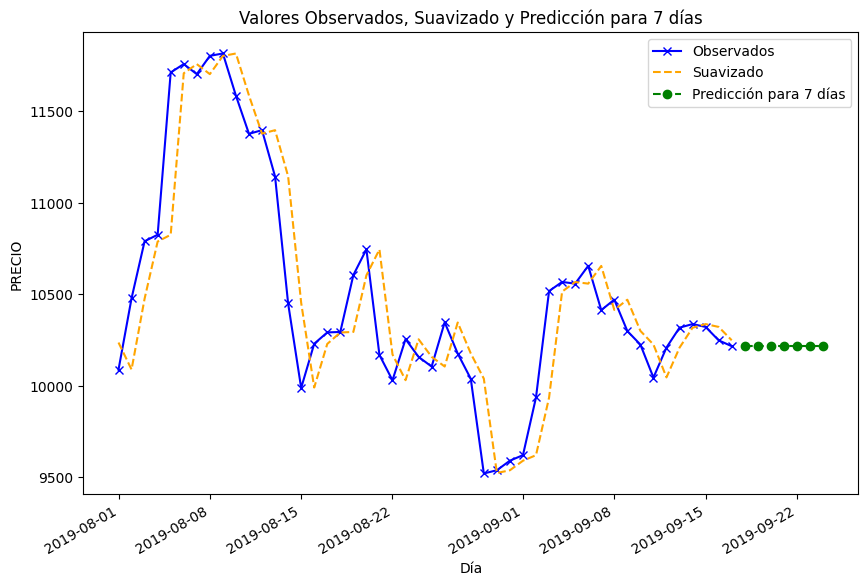

In [326]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
# Valores observados
plt.plot(precio_R.index, precio_R, label='Observados', marker='x', linestyle='-', color='blue')
# Valores suavizados (fitted)
plt.plot(precio_R.index, modelo_ses.fittedvalues, label='Suavizado', linestyle='--', color='orange')
# Predicción para 7 días
plt.plot(precio_s1.index, precio_s1, label='Predicción para 7 días', linestyle='--', marker='o', color='green')
plt.xlabel('Día')
plt.ylabel('PRECIO')
plt.title('Valores Observados, Suavizado y Predicción para 7 días')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

In [327]:
# Aplicar suavizado exponencial doble (Holt).
modelo_holt = sm.tsa.ExponentialSmoothing(precio_R, trend='add', damped=False).fit()
# Obtener predicciones para 7 días
predicciones = modelo_holt.forecast(steps=7)
# Mostrar la descripción del modelo
modelo_holt.summary()
# para controlar los valores de alpha y beta: .fit(smooothing_level = alpha, smoothing_slope = beta, optimized = False)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9796\977517322.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  modelo_holt = sm.tsa.ExponentialSmoothing(precio_R, trend='add', damped=False).fit()


Dep. Variable:,PRECIO,No. Observations:,48
Model:,ExponentialSmoothing,SSE,3730853.102
Optimized:,True,AIC,548.525
Trend:,Additive,BIC,556.010
Seasonal:,None,AICC,550.574
Seasonal Periods:,None,Date:,"Sat, 08 Feb 2025"
Box-Cox:,False,Time:,11:02:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9955000,alpha,True
smoothing_trend,0.1279929,beta,True


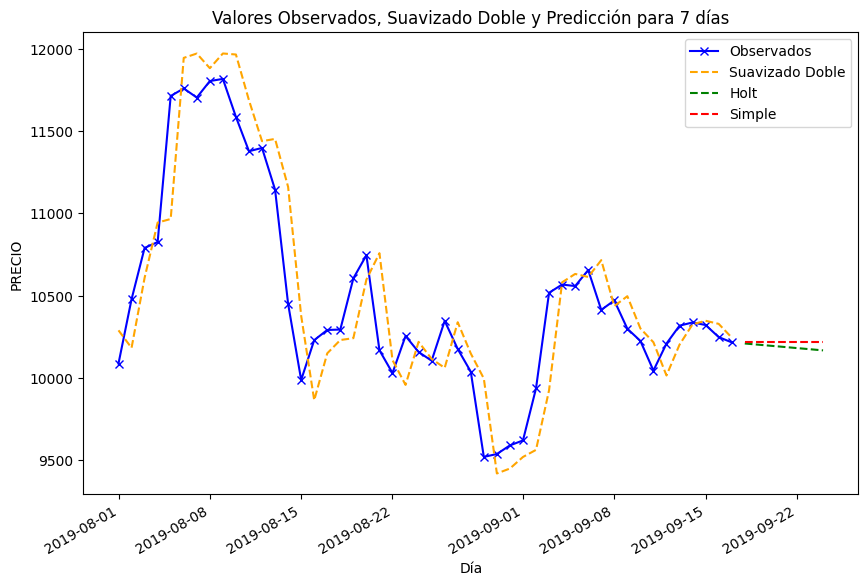

In [328]:
plt.figure(figsize=(10, 6))
plt.plot(precio_R.index, precio_R, label='Observados',
marker='x', linestyle='-', color='blue')
plt.plot(precio_R.index, modelo_holt.fittedvalues,
label='Suavizado Doble', linestyle='--', color='orange')
plt.plot(predicciones.index, predicciones, label='Holt',
linestyle='--',color='green')
plt.plot(precio_s1.index, precio_s1, label='Simple',
linestyle='--', color='red')
plt.xlabel('Día')
plt.ylabel('PRECIO')
plt.title('Valores Observados, Suavizado Doble y Predicción para 7 días')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

## Autocorrelacion

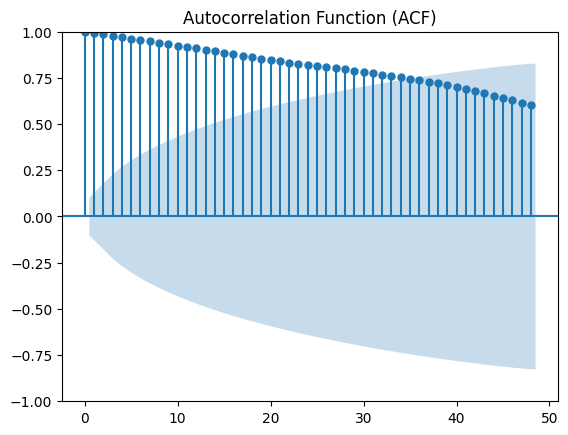

In [361]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Bitcoin_A['PRECIO'], lags=48, alpha = 0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()


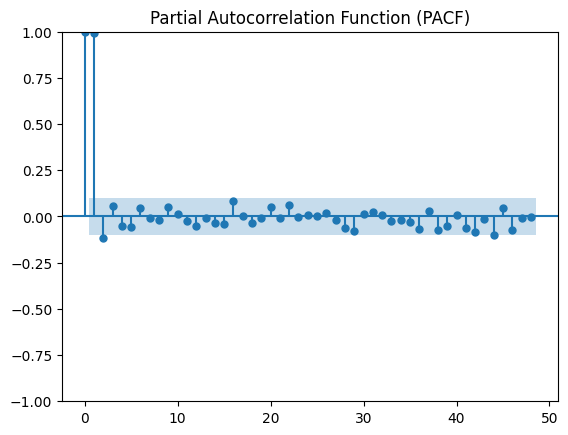

In [362]:
# Plot PACF
plot_pacf(Bitcoin_A['PRECIO'], lags=48, alpha = 0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Archivo Cordoba

In [329]:
v_cordoba = pd.read_excel("Cordoba.xlsx")
print(v_cordoba.head())

#Se observa que la columna de las fechas no tiene nombre, por lo que:
v_cordoba.columns=['Date','V_Resident','V_Extranj']

v_cordoba['Date'] = pd.to_datetime(v_cordoba['Date'], format='%YM%m')
v_cordoba.index = v_cordoba['Date']
del v_cordoba['Date']
print(v_cordoba.head())

            V_Resident  V_Extranj
0  2005M01       27816       9332
1  2005M02       34920      11387
2  2005M03       45221      21663
3  2005M04       41027      29094
4  2005M05       50750      32076
            V_Resident  V_Extranj
Date                             
2005-01-01       27816       9332
2005-02-01       34920      11387
2005-03-01       45221      21663
2005-04-01       41027      29094
2005-05-01       50750      32076


Text(0.5, 1.0, 'Viajeros alojados en hoteles en Córdoba')

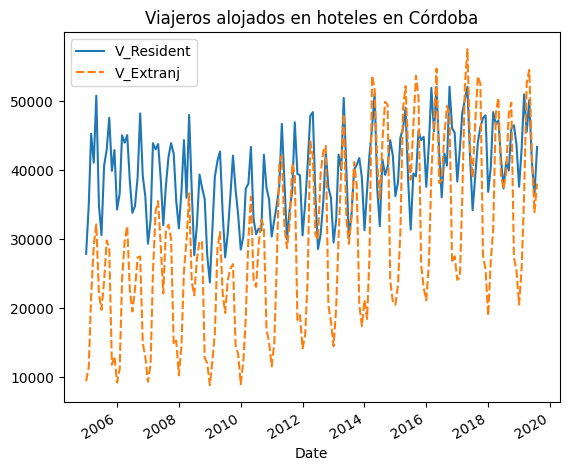

In [330]:
sns.lineplot(v_cordoba)
plt.xticks(rotation=30, ha='right')
# Ajustes de diseño
plt.title('Viajeros alojados en hoteles en Córdoba')

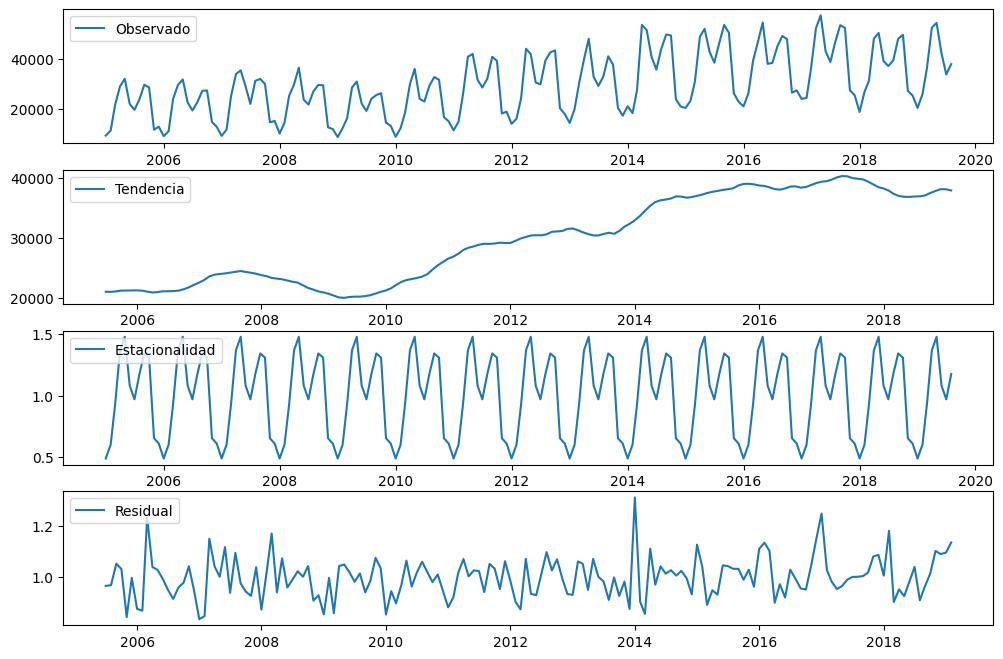

In [331]:
#Descompondremos la serie temporal para conocer su estacionalidad, tendencia y residuos:
from statsmodels.tsa.seasonal import seasonal_decompose
# Realizar la descomposición estacional
result = seasonal_decompose(v_cordoba['V_Extranj'], model='multiplicative')

# Visualizar las componentes
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.show()


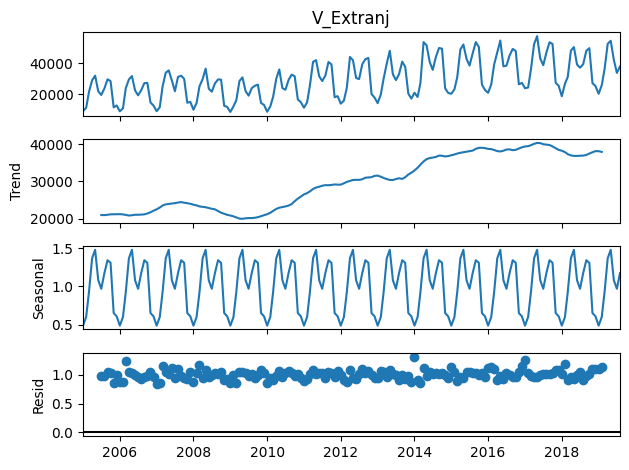

In [332]:
result.plot()
pass

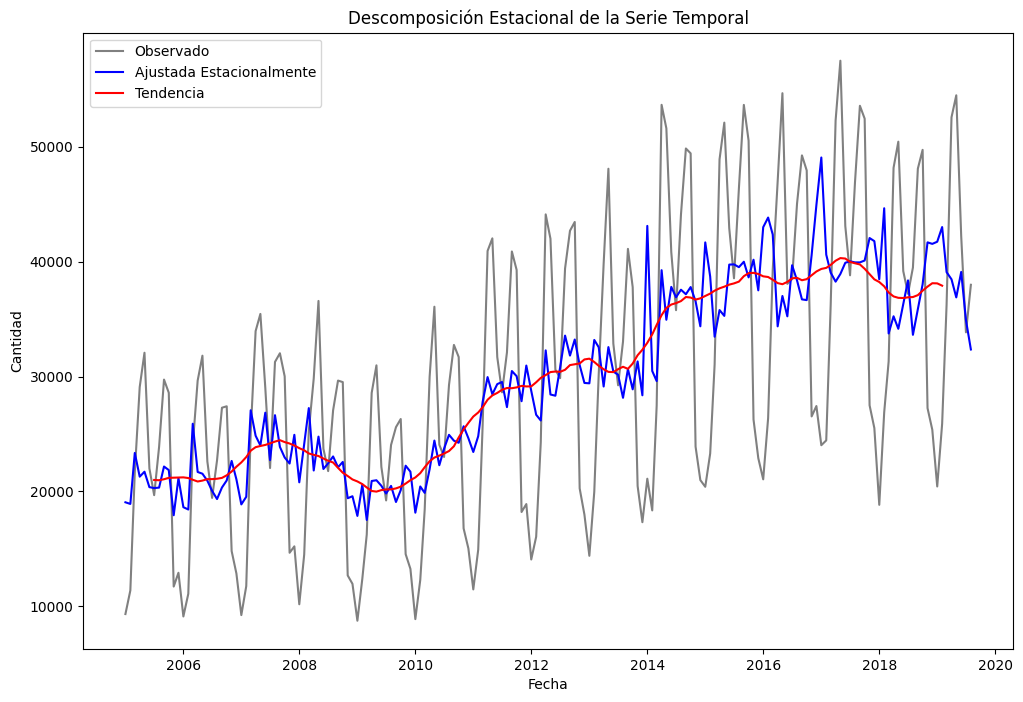

In [333]:
# Crear un gráfico que muestre las componentes
plt.figure(figsize=(12, 8))
plt.plot(result.observed, label='Observado', color='grey')
plt.plot(result.observed/result.seasonal, label='Ajustada Estacionalmente', color='blue')
plt.plot(result.trend, label='Tendencia', color='red')

# Añadir leyendas y título
plt.legend()
plt.title('Descomposición Estacional de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()


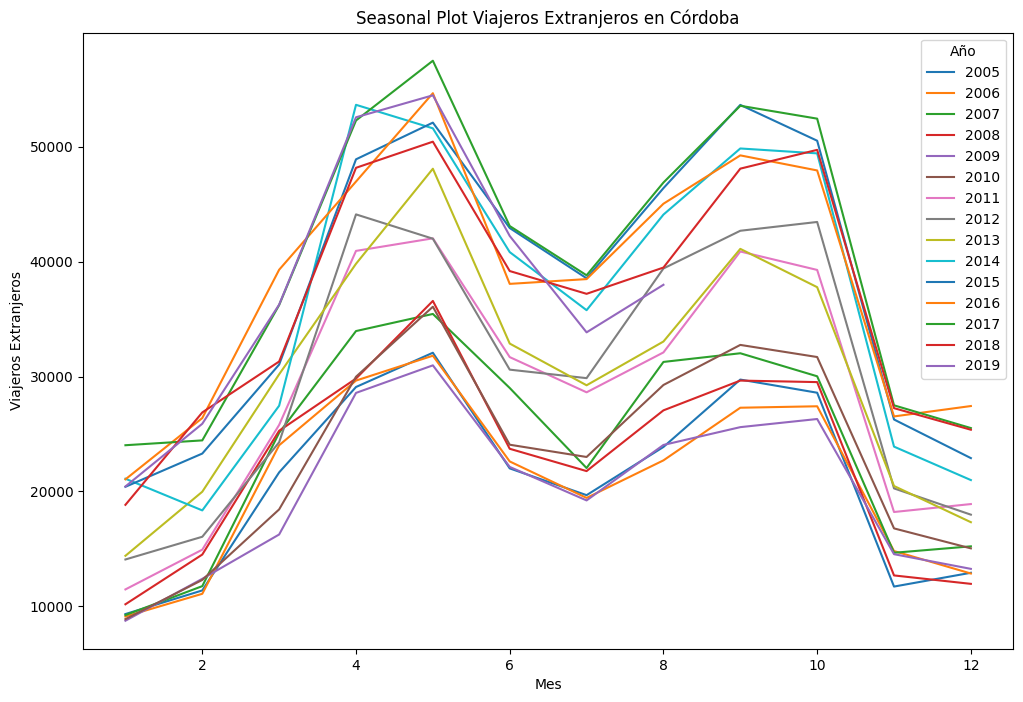

In [334]:
v_cordoba['Año'] = pd.to_datetime(v_cordoba.index, format='%YM%m').year
plt.figure(figsize=(12, 8))
for Año, datos_año in v_cordoba.groupby('Año'):
    plt.plot(datos_año.index.month, datos_año['V_Extranj'], label=str(Año))
    # Añadir leyendas y título
plt.legend(title='Año')
plt.title('Seasonal Plot Viajeros Extranjeros en Córdoba')
plt.xlabel('Mes')
plt.ylabel('Viajeros Extranjeros')
# Mostrar el gráfico
plt.show()

## Predicciones

In [335]:
# Aplicar suavizado Holt-Winters. .fit(smoothing.seasonal = gamma).
modelo_holt_winters = sm.tsa.ExponentialSmoothing(v_cordoba['V_Extranj'], trend='add', seasonal='multiplicative', seasonal_periods=12).fit()
# Obtener predicciones para 1 año, es aqui donde podemos aumentar o disminuir los valores de prediccion
predicciones_hw = modelo_holt_winters.forecast(steps=12)
# Mostrar la descripción del modelo
modelo_holt_winters.summary()

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,V_Extranj,No. Observations:,176
Model:,ExponentialSmoothing,SSE,1235445343.678
Optimized:,True,AIC,2806.502
Trend:,Additive,BIC,2857.229
Seasonal:,Multiplicative,AICC,2810.858
Seasonal Periods:,12,Date:,"Sat, 08 Feb 2025"
Box-Cox:,False,Time:,11:02:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2525000,alpha,True
smoothing_trend,0.0001,beta,True


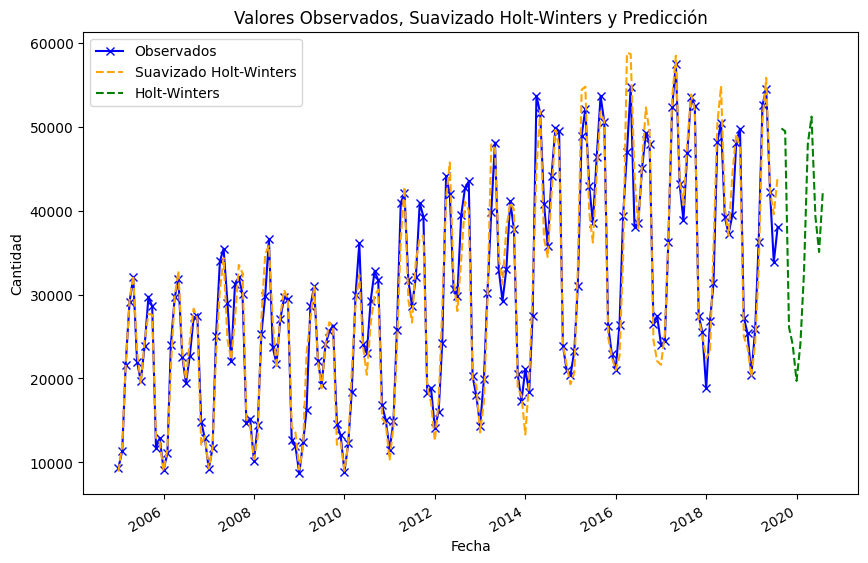

In [336]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
plt.plot(v_cordoba.index, v_cordoba['V_Extranj'], label='Observados', marker='x', linestyle='-', color='blue')
plt.plot(v_cordoba.index, modelo_holt_winters.fittedvalues, label='Suavizado Holt-Winters', linestyle='--', color='orange')
plt.plot(predicciones_hw.index, predicciones_hw, label='Holt-Winters', linestyle='--',color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Valores Observados, Suavizado Holt-Winters y Predicción')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

## Autocorrealcion

Text(0.5, 1.0, 'PACF')

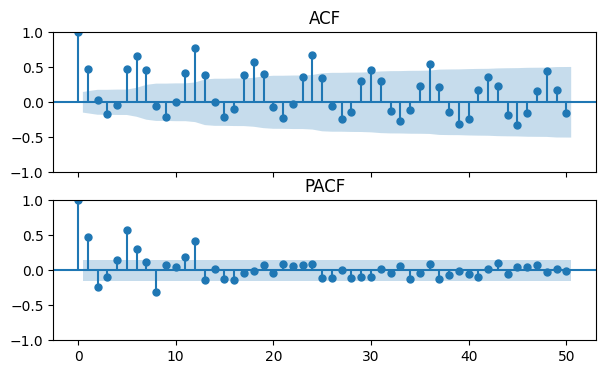

In [363]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(v_cordoba['V_Resident'], ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('ACF')
plot_pacf(v_cordoba['V_Resident'], ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('PACF')

### ARIMA

In [ ]:
precio = Bitcoin_A['PRECIO']
sns.lineplot(precio)
plt.title('Precio del Bitcoin')


# Archivo de vuelos.

## 1. Representar la serie y comentar el gráfico. ¿La serie es estacionaria? ¿Tiene tendencia? ¿Tiene comportamiento estacional? ¿Cuál es el periodo?

In [337]:
v_vuelos = pd.read_excel("VUELOS.xlsx")
print(v_vuelos.head())

v_vuelos['MES'] = pd.to_datetime(v_vuelos['MES'], format='%YM%m')
v_vuelos.index = v_vuelos['MES']
del v_vuelos["MES"]
print(v_vuelos.head())

       MES  Vuelos
0  1995M01   53180
1  1995M02   48647
2  1995M03   55353
3  1995M04   56751
4  1995M05   59487
            Vuelos
MES               
1995-01-01   53180
1995-02-01   48647
1995-03-01   55353
1995-04-01   56751
1995-05-01   59487


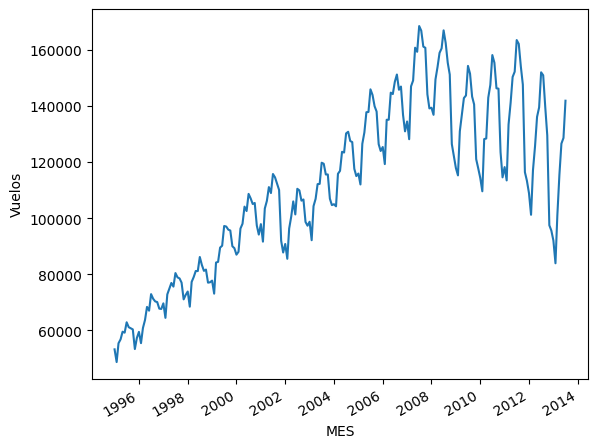

In [365]:
sns.lineplot(v_vuelos["Vuelos"])
plt.xticks(rotation=30, ha='right')
plt.show()

* No es estacionaria ni en media ni en varianza, se puede ver porque tiene tendencia de ir subiendo para la media y para la hetero... se puede ver porque la varianza en los primeros años es mucho menor a la varianza en los últimos años.
* Existe una tendencia posistiva en los primeros años (hasta el año 2008)
* Tiene una estacionalidad anual, donde se nota que en los meses de verano hay mas vuelos, mientras que en los de invierno suele haber un decrecimiento con respecto a su tendencia

## 2. Calcular los coeficientes de estacionalidad y su representación junto con la componente irregular. ¿Qué mes tiene un coeficiente mayor? ¿Qué significa? ¿Cuál es el mes que tiene menor? ¿Cuál es su significado?
Como existe una variabilida que incrementa a lo largo del tiempo he decidido usar un modelo multiplicativo.

In [339]:
result = seasonal_decompose(v_vuelos, model='multiplicative')
print(result.seasonal[:12])

print(f"mes con coeficiente de estacionalidad mayor es: {result.seasonal.idxmax()}")
print(f"mes con coeficiente de estacionalidad menor es: {result.seasonal.idxmin()}")

MES
1995-01-01    0.906183
1995-02-01    0.866777
1995-03-01    0.976114
1995-04-01    0.999328
1995-05-01    1.054177
1995-06-01    1.049321
1995-07-01    1.114847
1995-08-01    1.098805
1995-09-01    1.060600
1995-10-01    1.044421
1995-11-01    0.924759
1995-12-01    0.904668
Name: seasonal, dtype: float64
mes con coeficiente de estacionalidad mayor es: 1995-07-01 00:00:00
mes con coeficiente de estacionalidad menor es: 1995-02-01 00:00:00


Todo esto significa que dentro de la estacionalidad, se puede ver que en Julio se presentan los picos máximos y en febrero se presentan los picos mínimos

## 3. Representar la serie, la componente estacional, la estimación de la tendencia y el error. ¿Qué dirías sobre la tendencia del número de vuelos en los últimos cuatro años? ¿Y sobre su comportamiento estacional?

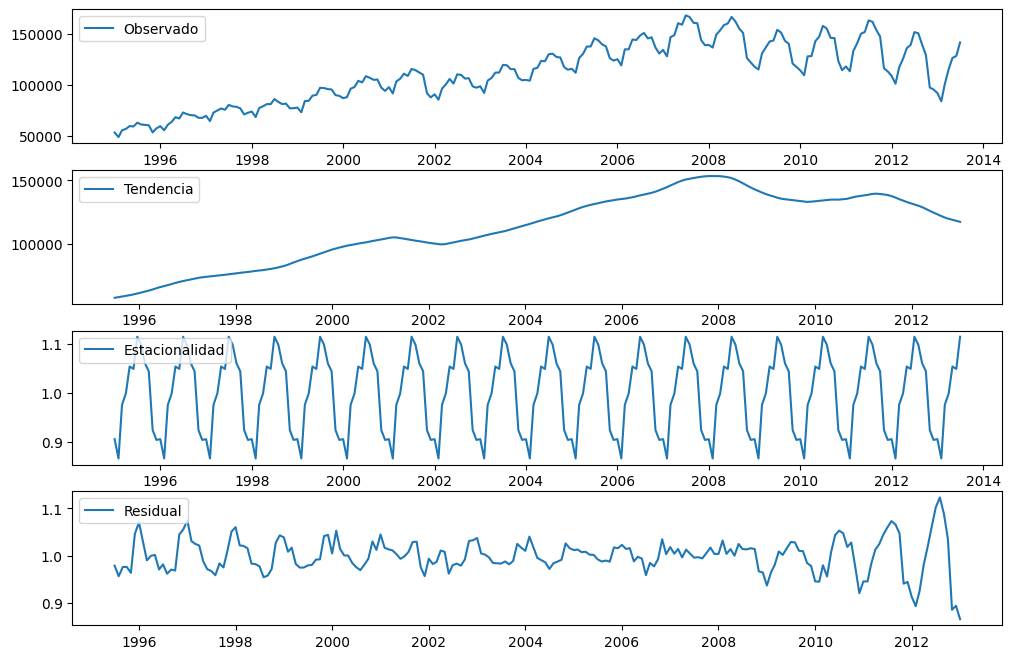

In [340]:
# Visualizar las componentes
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.show()

* En los ultimos 4 años ha habido una tendencia descendente del uso del avion como medio de transporte. 
* A su vez se puede ver que al ser hetero... se ha dado mas variabilidad a lo largo del tiempo. Esto ha dado con un problema a la hora de representar la residual, y es que toma como referencia de estacionalidad los meses intermedios, y la residual no tiene una forma "aleatoria" sino que en los extremos se peude ver la influencia de la variabilidad en la estacionalidad.

## 4. Representar sobre la serie de vuelos original, la tendencia calculada con la descomposición y la serie ajustada estacionalmente. ¿Cómo se calcula la serie ajustada estacionalmente?

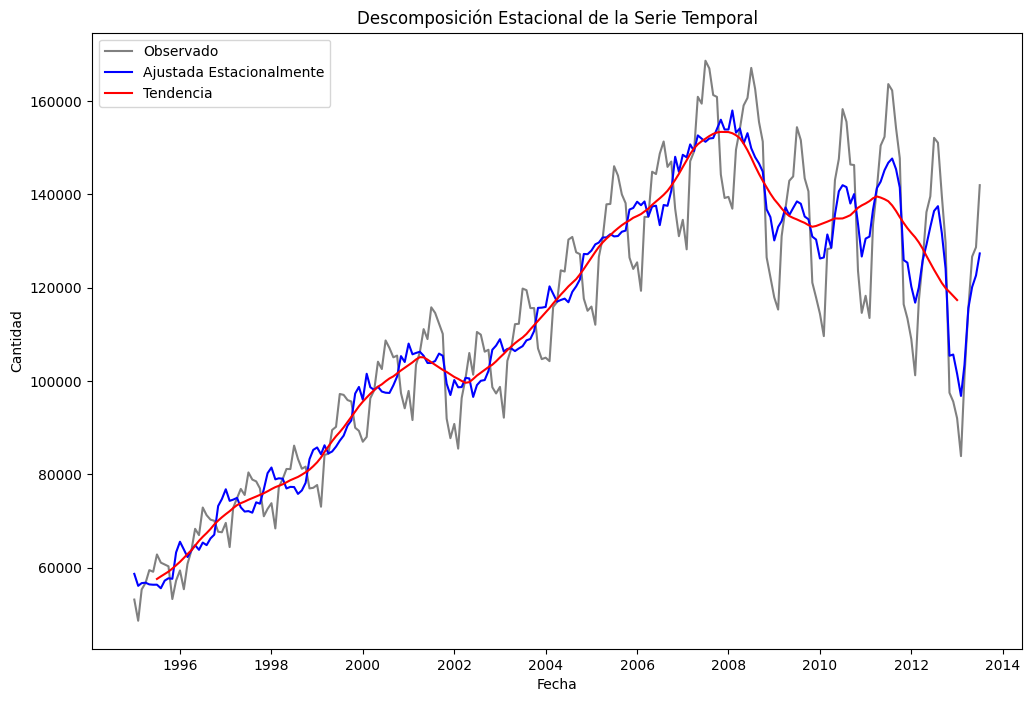

In [341]:
plt.figure(figsize=(12, 8))
plt.plot(result.observed, label='Observado', color='grey')
plt.plot(result.observed/result.seasonal, label='Ajustada Estacionalmente', color='blue')
plt.plot(result.trend, label='Tendencia', color='red')

# Añadir leyendas y título
plt.legend()
plt.title('Descomposición Estacional de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

## 5. Representar las series de cada año ¿En qué año hubo más vuelos?

In [342]:
v_vuelos['Año'] = pd.to_datetime(v_vuelos.index, format='%YM%m').year
print(v_vuelos)


            Vuelos   Año
MES                     
1995-01-01   53180  1995
1995-02-01   48647  1995
1995-03-01   55353  1995
1995-04-01   56751  1995
1995-05-01   59487  1995
1995-06-01   59137  1995
1995-07-01   62845  1995
1995-08-01   61095  1995
1995-09-01   60703  1995
1995-10-01   60308  1995
1995-11-01   53297  1995
1995-12-01   57253  1995
1996-01-01   59419  1996
1996-02-01   55395  1996
1996-03-01   60810  1996
1996-04-01   63665  1996
1996-05-01   68339  1996
1996-06-01   66990  1996
1996-07-01   72901  1996
1996-08-01   71251  1996
1996-09-01   70301  1996
1996-10-01   70064  1996
1996-11-01   67718  1996
1996-12-01   67604  1996
1997-01-01   69608  1997
1997-02-01   64431  1997
1997-03-01   72808  1997
1997-04-01   74916  1997
1997-05-01   76890  1997
1997-06-01   75590  1997
1997-07-01   80421  1997
1997-08-01   78891  1997
1997-09-01   78501  1997
1997-10-01   76996  1997
1997-11-01   71031  1997
1997-12-01   72609  1997
1998-01-01   73832  1998
1998-02-01   68423  1998


In [343]:
len(v_vuelos.groupby("Año"))

19

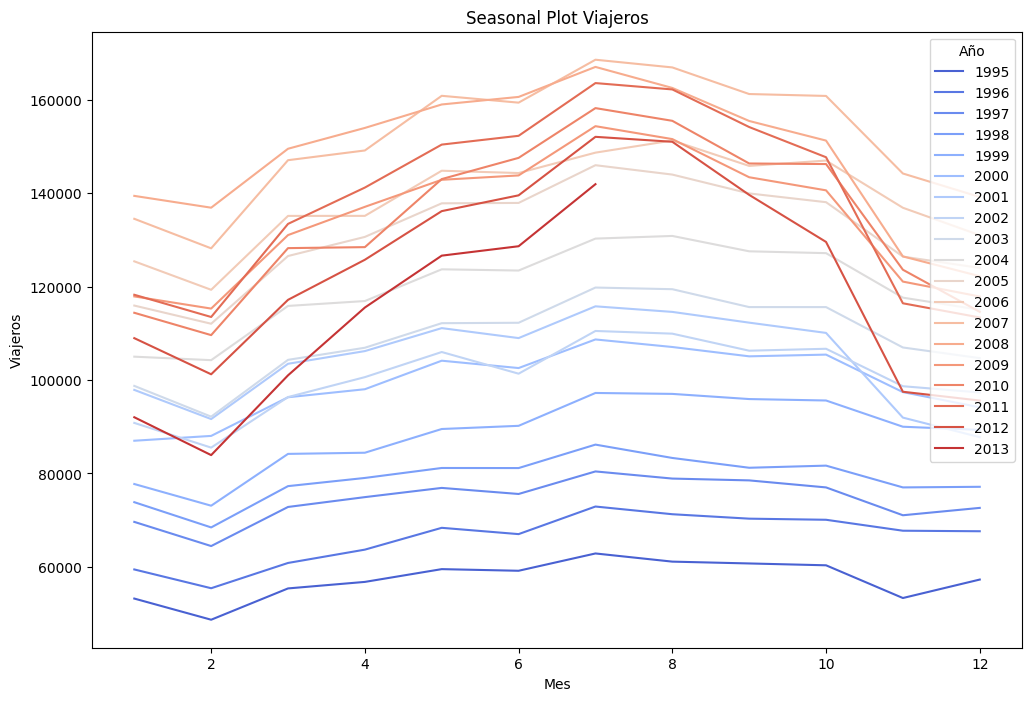

In [344]:
# Elegire una paleta de Seaborn
colores = color_palette('coolwarm', n_colors=len(v_vuelos.groupby("Año")))

plt.figure(figsize=(12, 8))
indice = 0
valor_maximo = 0
for Año, datos_año in v_vuelos.groupby('Año'):
    plt.plot(datos_año.index.month, datos_año["Vuelos"], label=str(Año), color= colores[indice])
    indice+=1
    vuelos = datos_año['Vuelos'].sum()
    if vuelos>valor_maximo:
        valor_maximo = vuelos
        ano_maximo = Año
    # Añadir leyendas y título
plt.legend(title='Año')
plt.title('Seasonal Plot Viajeros')
plt.xlabel('Mes')
plt.ylabel('Viajeros')
# Mostrar el gráfico
plt.show()

In [345]:
print(f"El año  donde ha habido mas vuelos es en el {ano_maximo}")

El año  donde ha habido mas vuelos es en el 2007


## 6. Para comprobar la eficacia de los métodos de predicción que vamos a hacer en los siguientes apartados

In [346]:
v_vuelos_TR = v_vuelos.iloc[:-12]
len(v_vuelos_TR.index)

211

## 7. Encontrar el modelo de suavizado exponencial más adecuado.

In [347]:
# Aplicar suavizado Holt-Winters. .fit(smoothing.seasonal = gamma).
modelo_holt_winters = sm.tsa.ExponentialSmoothing(v_vuelos_TR["Vuelos"], trend='add', seasonal='multiplicative', seasonal_periods=12).fit()
# Obtener predicciones para 1 año, es aqui donde podemos aumentar o disminuir los valores de prediccion
predicciones_hw = modelo_holt_winters.forecast(steps=12)
# Mostrar la descripción del modelo
modelo_holt_winters.summary()

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Vuelos,No. Observations:,211
Model:,ExponentialSmoothing,SSE,2003820125.834
Optimized:,True,AIC,3422.024
Trend:,Additive,BIC,3475.653
Seasonal:,Multiplicative,AICC,3425.586
Seasonal Periods:,12,Date:,"Sat, 08 Feb 2025"
Box-Cox:,False,Time:,11:02:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6414286,alpha,True
smoothing_trend,0.0001,beta,True


In [348]:
v_vuelos_TR["holt_winter"]=modelo_holt_winters.fittedvalues


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9796\2298278645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_vuelos_TR["holt_winter"]=modelo_holt_winters.fittedvalues


211 211 223


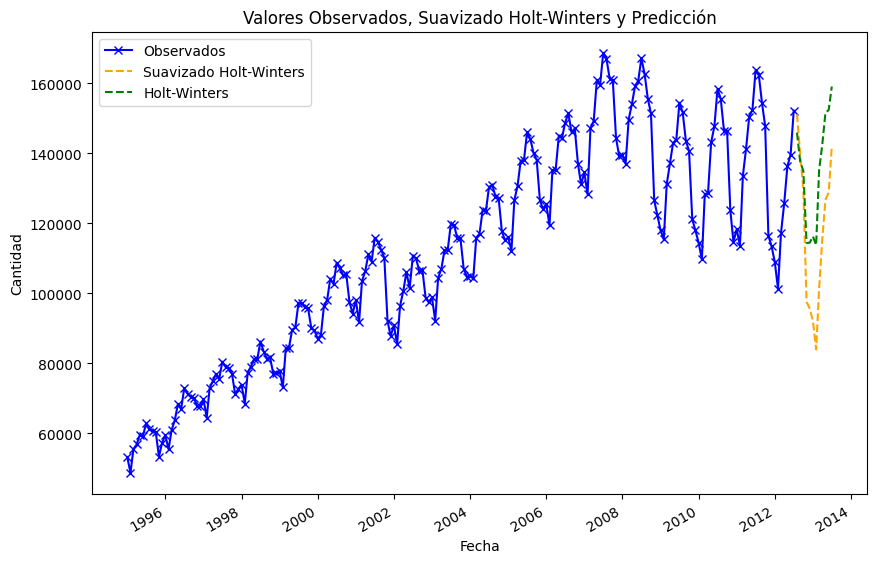

In [349]:
# Crear un gráfico con matplotlib
print(len(modelo_holt_winters.fittedvalues), len(v_vuelos_TR["Vuelos"]), len(v_vuelos.index))
plt.figure(figsize=(10, 6))
plt.plot(v_vuelos_TR.index, v_vuelos_TR["Vuelos"], label='Observados', marker='x', linestyle='-', color='blue')
plt.plot(v_vuelos.index[-12:], v_vuelos["Vuelos"][-12:], label='Suavizado Holt-Winters', linestyle='--', color='orange')
plt.plot(predicciones_hw.index, predicciones_hw, label='Holt-Winters', linestyle='--',color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Valores Observados, Suavizado Holt-Winters y Predicción')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

## 8. Suavizado de la serie. Usar el logaritmo.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9796\379022821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_vuelos_TR["Suave"]=np.log(v_vuelos_TR["Vuelos"])


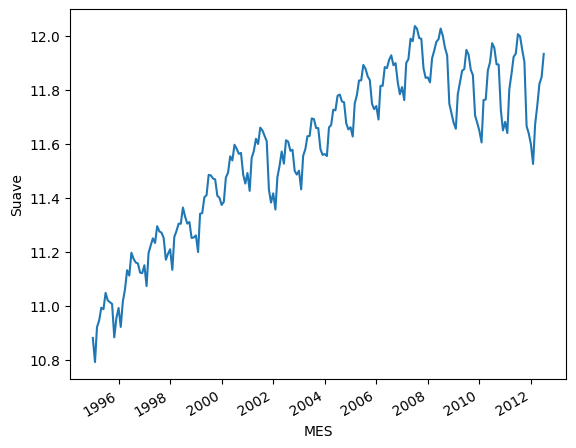

In [350]:


v_vuelos_TR["Suave"]=np.log(v_vuelos_TR["Vuelos"])
sns.lineplot(v_vuelos_TR["Suave"])
plt.xticks(rotation=30, ha='right')
plt.show()

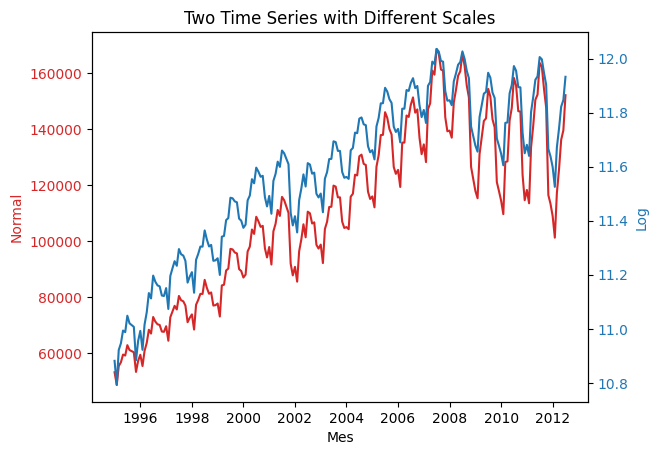

In [351]:
fig, ax1 = plt.subplots()

# 2. Primera serie en el eje izquierdo (ax1)
color = 'tab:red'
ax1.set_xlabel('Mes')
ax1.set_ylabel('Normal', color=color)
ax1.plot(v_vuelos_TR["Vuelos"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 3. Segunda serie en el eje derecho (ax2)
ax2 = ax1.twinx() # Compartir el eje x
color = 'tab:blue'
ax2.set_ylabel('Log', color=color)
ax2.plot(v_vuelos_TR["Suave"],color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 4. Ajustes de diseño
plt.title('Two Time Series with Different Scales')
plt.show()

## 9. Diferenciacion.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9796\1751857712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_vuelos_TR["diff_suave"]=v_vuelos_TR["Suave"].diff()


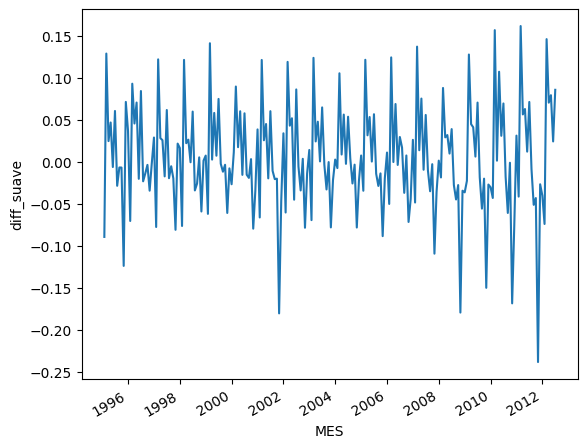

In [352]:
v_vuelos_TR["diff_suave"]=v_vuelos_TR["Suave"].diff()
sns.lineplot(v_vuelos_TR["diff_suave"])
plt.xticks(rotation=30, ha='right')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9796\2174648804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_vuelos_TR["diff_normal"]=v_vuelos_TR["Vuelos"].diff()


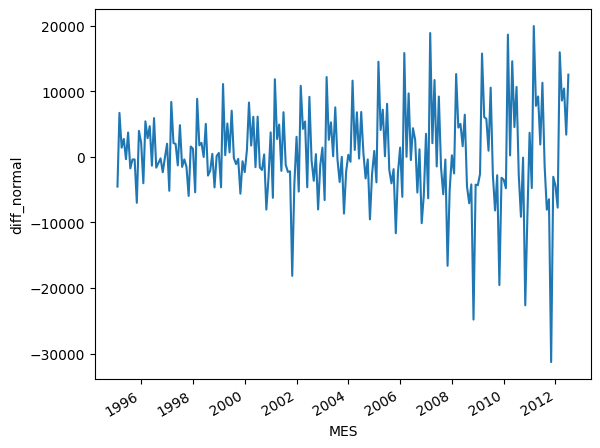

In [353]:
v_vuelos_TR["diff_normal"]=v_vuelos_TR["Vuelos"].diff()
sns.lineplot(v_vuelos_TR["diff_normal"])
plt.xticks(rotation=30, ha='right')
plt.show()

In [354]:
v_vuelos_TR.dropna()
pass

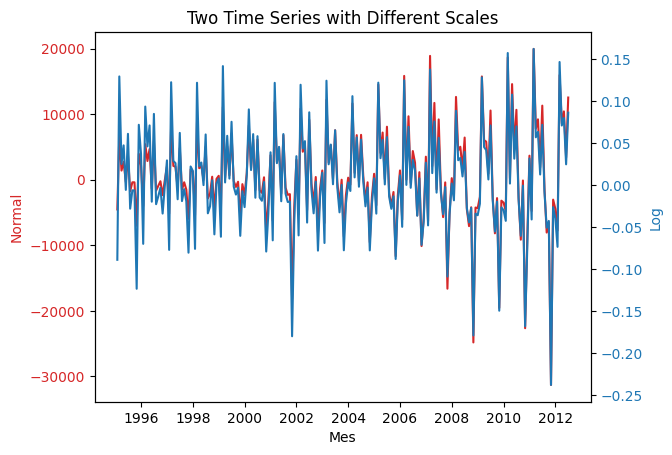

In [355]:
fig, ax1 = plt.subplots()

# 2. Primera serie en el eje izquierdo (ax1)
color = 'tab:red'
ax1.set_xlabel('Mes')
ax1.set_ylabel('Normal', color=color)
ax1.plot(v_vuelos_TR["diff_normal"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 3. Segunda serie en el eje derecho (ax2)
ax2 = ax1.twinx() # Compartir el eje x
color = 'tab:blue'
ax2.set_ylabel('Log', color=color)
ax2.plot(v_vuelos_TR["diff_suave"],color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 4. Ajustes de diseño
plt.title('Two Time Series with Different Scales')
plt.show()

## 10. Ajustar el modelo

In [359]:
# Aplicar suavizado Holt-Winters. .fit(smoothing.seasonal = gamma).
modelo_holt_winters = sm.tsa.ExponentialSmoothing(v_vuelos_TR["diff_suave"], trend='add', seasonal='add', seasonal_periods=12).fit()
# Obtener predicciones para 1 año, es aqui donde podemos aumentar o disminuir los valores de prediccion
predicciones_hw = modelo_holt_winters.forecast(steps=12)
# Mostrar la descripción del modelo
modelo_holt_winters.summary()
predicciones_hw

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2012-08-01   NaN
2012-09-01   NaN
2012-10-01   NaN
2012-11-01   NaN
2012-12-01   NaN
2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
2013-06-01   NaN
2013-07-01   NaN
Freq: MS, dtype: float64

In [357]:
# predicciones_hw_1 = np.log(predicciones_hw)
# predicciones_hw_1 = predicciones_hw_1.diff()

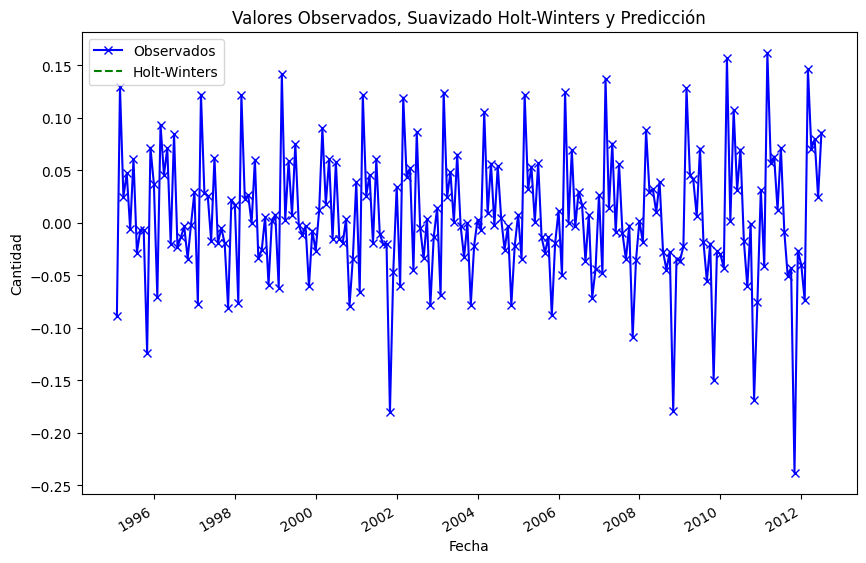

2012-08-01   NaN
2012-09-01   NaN
2012-10-01   NaN
2012-11-01   NaN
2012-12-01   NaN
2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
2013-06-01   NaN
2013-07-01   NaN
Freq: MS, dtype: float64


In [358]:
plt.figure(figsize=(10, 6))
plt.plot(v_vuelos_TR.index, v_vuelos_TR["diff_suave"], label='Observados', marker='x', linestyle='-', color='blue')
# plt.plot(v_vuelos.index[-12:], v_vuelos["Vuelos"][-12:], label='Suavizado Holt-Winters', linestyle='--', color='orange')
plt.plot(predicciones_hw.index, predicciones_hw, label='Holt-Winters', linestyle='--',color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Valores Observados, Suavizado Holt-Winters y Predicción')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()
print(predicciones_hw)